# 大數據與商業分析-期中專案-第11組

## 鴻海股價預測

### 資料前處理

In [46]:
# install package
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from sklearn.linear_model import LogisticRegression 
import re
%matplotlib inline

In [47]:
#讀入新聞資料
df=pd.read_csv('bda2020_dataset/news.csv',encoding='big5')

In [48]:
#選取跟鴻海有關的新聞資料
np.sum(df["content"].str.contains("鴻海|富士康", case=False, na=False))

13089

In [49]:
news=df[df["content"].str.contains("鴻海|富士康", case=False, na=False)]

In [50]:
news

,id,p_type,s_name,s_area_name,post_time,title,author,content,page_url
28,1451624207680_N01,news,yahoo股市,重大要聞,2016/1/1 12:20:00,日月光強娶 矽品反擊招數已有限 考驗林文伯智慧,鉅亨網,鉅亨網記者蔡宗憲 台北封測廠矽品 (2325) 與日月光 (2311) 股權之爭持續延燒，矽...,https://tw.stock.yahoo.com/news_content/url/d/...
35,1451697107494_N01,news,yahoo股市,重大要聞,2016/1/2 08:53:00,經濟頭條~15檔迎財神 領軍衝鋒,中央社,根據法人機構的研究，2016年台股的五大投資趨勢，為虛擬實境（VR）、機器人、汽車電子與新能...,https://tw.stock.yahoo.com/news_content/url/d/...
43,1451706107903_N01,news,yahoo股市,重大要聞,2016/1/2 11:12:00,iPhone新4吋 傳7大特色先睹為快,中央社,（中央社記者鍾榮峰台北2016年1月2日電）蘋果(Apple)新4吋iPhone萬眾矚目，各...,https://tw.stock.yahoo.com/news_content/url/d/...
47,1451716907831_N01,news,yahoo股市,重大要聞,2016/1/2 14:11:00,經營實績恐不敵民族情感 鴻夏戀修成正果難成,鉅亨網,鉅亨網記者李宜儒 台北從2012年到2016年，鴻海 (2317) 與夏普(6753-JP)...,https://tw.stock.yahoo.com/news_content/url/d/...
70,1451783511311_N01,news,yahoo股市,重大要聞,2016/1/3 08:59:00,《各報要聞》外資歸隊，台股帶量拚季線,時報資訊,台股上周封關日集中及櫃買兩市場同步收紅，本周為105年元月首周，市場聚焦新掛牌股、外資歸隊、...,https://tw.stock.yahoo.com/news_content/url/d/...
...,...,...,...,...,...,...,...,...,...
246753,1545982606261_N01,news,yahoo股市,最新財經新聞,2018/12/28 15:09:00,《集中市場》三大法人買超38.75億元，金豬年先蹲後跳,時報資訊,周四美股如搭雲霄飛車，開低震盪又翻紅。台股封關日交投清淡，在三巨頭大立光 (3008) 、台...,https://tw.stock.yahoo.com/news/集中市場-三大法人買超38-...
246778,1545982677120_N01,news,yahoo股市,重大要聞,2018/12/28 15:17:00,【Y晚報】元月行情可期 台股封關收復9700點,Yahoo奇摩股市,（開盤日15:30出刊）在道瓊指數26日創下史上最大漲點後，昨(27)日傳出川普考慮頒布行政...,https://tw.stock.yahoo.com/news/【y晚報】元月行情可期-台股...
247040,1546051842571_N01,news,yahoo股市,重大要聞,2018/12/29 10:21:00,《各報要聞》外資今年追捧友達、賣鴻海不回頭,時報資訊,"台股迎接2019年，回顧今（2018）年的台股，外資賣超達3,551億元，創史上第二高紀錄，...",https://tw.stock.yahoo.com/news/各報要聞-外資今年追捧友達-...
247130,1546075248457_N01,news,yahoo股市,最新財經新聞,2018/12/29 16:54:00,《台北股市》今年市值增減，電子哭、傳產笑,時報資訊,台股2018年封關前夕急起直追，仍無法挽回年跌8.6％的疲態，以蘋概三王為首的電子股今年股價...,https://tw.stock.yahoo.com/news/台北股市-今年市值增減-電子...


In [51]:
#整理我們的新聞資料，選取要用的欄位，並根據需要轉換欄位資料格式
news=news[['id','post_time','title','content']]
#將新聞時間轉換成至日期（不用時分秒）
news['post_time'] = pd.to_datetime(news['post_time']).dt.date
news['post_time']=pd.to_datetime(news['post_time'])
#將新聞資料的標題和內文合併，一起當作新聞內容資料，因為標題也有預測詮釋力
news["content"]=news["title"].str.cat(news["content"], sep ="。")
news=news.drop(["title"],axis=1)
news=news.reset_index(drop=True)

<ipython-input-51-713a4ce25565>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['post_time'] = pd.to_datetime(news['post_time']).dt.date
<ipython-input-51-713a4ce25565>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['post_time']=pd.to_datetime(news['post_time'])
<ipython-input-51-713a4ce25565>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [52]:
news

,id,post_time,content
0,1451624207680_N01,2016-01-01,日月光強娶 矽品反擊招數已有限 考驗林文伯智慧。鉅亨網記者蔡宗憲 台北封測廠矽品 (2325...
1,1451697107494_N01,2016-01-02,經濟頭條~15檔迎財神 領軍衝鋒。根據法人機構的研究，2016年台股的五大投資趨勢，為虛擬實...
2,1451706107903_N01,2016-01-02,iPhone新4吋 傳7大特色先睹為快。（中央社記者鍾榮峰台北2016年1月2日電）蘋果(A...
3,1451716907831_N01,2016-01-02,經營實績恐不敵民族情感 鴻夏戀修成正果難成。鉅亨網記者李宜儒 台北從2012年到2016年，...
4,1451783511311_N01,2016-01-03,《各報要聞》外資歸隊，台股帶量拚季線。台股上周封關日集中及櫃買兩市場同步收紅，本周為105年...
...,...,...,...
13084,1545982606261_N01,2018-12-28,《集中市場》三大法人買超38.75億元，金豬年先蹲後跳。周四美股如搭雲霄飛車，開低震盪又翻紅...
13085,1545982677120_N01,2018-12-28,【Y晚報】元月行情可期 台股封關收復9700點。（開盤日15:30出刊）在道瓊指數26日創下...
13086,1546051842571_N01,2018-12-29,《各報要聞》外資今年追捧友達、賣鴻海不回頭。台股迎接2019年，回顧今（2018）年的台股，...
13087,1546075248457_N01,2018-12-29,《台北股市》今年市值增減，電子哭、傳產笑。台股2018年封關前夕急起直追，仍無法挽回年跌8....


In [53]:
#載入鴻海歷史股價
stock_df=pd.read_excel("鴻海歷史股價.xlsx",'Sheet1')

In [54]:
stock_df

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE
0,2317 鴻海,2016-01-04,80.27,80.27,77.70,78.10,35223,2804319,16770,15638288,8.39,1.30
1,2317 鴻海,2016-01-05,78.10,79.39,77.90,78.20,30125,2386189,14528,15638288,8.40,1.30
2,2317 鴻海,2016-01-06,77.41,78.20,76.42,78.10,42557,3325714,18197,15638288,8.39,1.30
3,2317 鴻海,2016-01-07,76.62,77.61,76.12,77.41,40523,3145237,19184,15638288,8.31,1.29
4,2317 鴻海,2016-01-08,76.32,77.41,76.32,77.11,27621,2150126,11120,15638288,8.28,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...
732,2317 鴻海,2018-12-24,70.80,71.40,70.70,71.40,11791,838847,5306,13862990,7.17,0.86
733,2317 鴻海,2018-12-25,70.00,70.90,70.00,70.70,10943,769819,6482,13862990,7.10,0.85
734,2317 鴻海,2018-12-26,70.90,71.20,70.20,70.20,9507,671527,5070,13862990,7.05,0.85
735,2317 鴻海,2018-12-27,71.80,71.80,70.80,70.80,17074,1217597,7161,13862990,7.11,0.85


In [55]:
#我們將收盤價當作是那天鴻海的股票價格
stock_df["price"]=stock_df["收盤價(元)"]
stock_df["time"]=stock_df["年月日"]

In [56]:
stock=stock_df[["time","price"]]

In [57]:
stock

,time,price
0,2016-01-04,78.10
1,2016-01-05,78.20
2,2016-01-06,78.10
3,2016-01-07,77.41
4,2016-01-08,77.11
...,...,...
732,2018-12-24,71.40
733,2018-12-25,70.70
734,2018-12-26,70.20
735,2018-12-27,70.80


In [58]:
# n=5 如果後五天股票價格變高則為漲，反之為跌
up_or_down=stock["price"].diff(periods=5)[5:].values
stock=stock.iloc[:-5]
stock["Price_Difference_after_Day5"]=up_or_down

<ipython-input-58-7b2be42128cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock["Price_Difference_after_Day5"]=up_or_down


In [59]:
stock

,time,price,Price_Difference_after_Day5
0,2016-01-04,78.10,-3.56
1,2016-01-05,78.20,-2.77
2,2016-01-06,78.10,-2.37
3,2016-01-07,77.41,-2.28
4,2016-01-08,77.11,-2.67
...,...,...,...
727,2018-12-18,70.80,0.60
728,2018-12-19,71.80,-1.10
729,2018-12-20,71.50,-1.30
730,2018-12-21,71.40,-0.60


In [62]:
#ratio程度
ratio=0.1
increase_num=np.quantile(stock[stock["Price_Difference_after_Day5"]>0]["Price_Difference_after_Day5"],ratio)
decrease_num=np.quantile(abs(stock[stock["Price_Difference_after_Day5"]<0]["Price_Difference_after_Day5"]),ratio)

In [63]:
#定義漲跌，如果五天後股價上漲超過ratio程度：則標記1代表上漲，下跌則標記0代表下跌，其他則標記成-1 後面不會使用這些被標記為-1的文章
def number_up_or_down(number):
    if number > increase_num:
        return 1
    elif number < decrease_num*(-1):
        return 0
    else:
        return -1

stock['up_or_down'] = stock['Price_Difference_after_Day5'].map(number_up_or_down)
stock['time']=pd.to_datetime(stock['time']).dt.date
stock['time']=pd.to_datetime(stock['time'])

<ipython-input-63-4fda8a80db9a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['up_or_down'] = stock['Price_Difference_after_Day5'].map(number_up_or_down)
<ipython-input-63-4fda8a80db9a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['time']=pd.to_datetime(stock['time']).dt.date
<ipython-input-63-4fda8a80db9a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [64]:
stock.head(10)

,time,price,Price_Difference_after_Day5,up_or_down
0,2016-01-04,78.10,-3.56,0
1,2016-01-05,78.20,-2.77,0
2,2016-01-06,78.10,-2.37,0
3,2016-01-07,77.41,-2.28,0
4,2016-01-08,77.11,-2.67,0
5,2016-01-11,74.54,-0.49,0
6,2016-01-12,75.43,-0.99,0
7,2016-01-13,75.73,-3.46,0
8,2016-01-14,75.13,-3.26,0
9,2016-01-15,74.44,-0.49,0


In [65]:
stock['up_or_down'].value_counts()

 1    316
 0    312
-1    104
Name: up_or_down, dtype: int64

In [66]:
#只挑選被標記是1或是0的歷史股價天
stock=stock[stock['up_or_down'].isin([1,0])]

In [67]:
stock.head(10)

,time,price,Price_Difference_after_Day5,up_or_down
0,2016-01-04,78.10,-3.56,0
1,2016-01-05,78.20,-2.77,0
2,2016-01-06,78.10,-2.37,0
3,2016-01-07,77.41,-2.28,0
4,2016-01-08,77.11,-2.67,0
5,2016-01-11,74.54,-0.49,0
6,2016-01-12,75.43,-0.99,0
7,2016-01-13,75.73,-3.46,0
8,2016-01-14,75.13,-3.26,0
9,2016-01-15,74.44,-0.49,0


In [68]:
stock['up_or_down'].value_counts()

1    316
0    312
Name: up_or_down, dtype: int64

In [69]:
news

,id,post_time,content
0,1451624207680_N01,2016-01-01,日月光強娶 矽品反擊招數已有限 考驗林文伯智慧。鉅亨網記者蔡宗憲 台北封測廠矽品 (2325...
1,1451697107494_N01,2016-01-02,經濟頭條~15檔迎財神 領軍衝鋒。根據法人機構的研究，2016年台股的五大投資趨勢，為虛擬實...
2,1451706107903_N01,2016-01-02,iPhone新4吋 傳7大特色先睹為快。（中央社記者鍾榮峰台北2016年1月2日電）蘋果(A...
3,1451716907831_N01,2016-01-02,經營實績恐不敵民族情感 鴻夏戀修成正果難成。鉅亨網記者李宜儒 台北從2012年到2016年，...
4,1451783511311_N01,2016-01-03,《各報要聞》外資歸隊，台股帶量拚季線。台股上周封關日集中及櫃買兩市場同步收紅，本周為105年...
...,...,...,...
13084,1545982606261_N01,2018-12-28,《集中市場》三大法人買超38.75億元，金豬年先蹲後跳。周四美股如搭雲霄飛車，開低震盪又翻紅...
13085,1545982677120_N01,2018-12-28,【Y晚報】元月行情可期 台股封關收復9700點。（開盤日15:30出刊）在道瓊指數26日創下...
13086,1546051842571_N01,2018-12-29,《各報要聞》外資今年追捧友達、賣鴻海不回頭。台股迎接2019年，回顧今（2018）年的台股，...
13087,1546075248457_N01,2018-12-29,《台北股市》今年市值增減，電子哭、傳產笑。台股2018年封關前夕急起直追，仍無法挽回年跌8....


In [70]:
#將新聞資料選取在有歷史股價的時間範圍
news=news[(news['post_time'] >= '2016-01-04') & (news['post_time'] <= '2018-12-27') ]

In [71]:
news

,id,post_time,content
5,1451867211260_N01,2016-01-04,經濟日報晨訊。◆台積電16奈米，完勝三星，製程強壓對手的14奈米，蘋果A10代工大單可望入袋...
6,1451869909491_N01,2016-01-04,統一證券：台股後市仍有可為。：雖然前一日歐美股市下挫，但上週四台股僅小跌6點以8273點開出...
7,1451870811472_N01,2016-01-04,券商晨訊台股投資組合建議 (1) 2016年 1月 4日。※券商推薦股：凱撒衛(1)、日揚(...
8,1451883409158_N01,2016-01-04,台股紅盤遭空襲 鴻海股價摜破80元大關 創近半年新低。歐美股市在年底封關日出現大跌，台股今天...
9,1451887907638_N01,2016-01-04,新年紅盤慘跌 台股重挫223.80點。（中央社台北2016年1月4日電）台股新年紅盤指數開低...
...,...,...,...
13062,1545897052508_N01,2018-12-27,【Y晚報】台積電領軍 指數收復9600點。（開盤日15:30出刊）據外媒報導，白宮經濟顧問委...
13063,1545899772403_N01,2018-12-27,陸股：滬股週四收跌0.61%連三黑，改寫49個月新低，權重股中國石化大跌近7%。陸股三大指數...
13064,1545901544670_N01,2018-12-27,12/27上市自營商買超排行前20名。股票名稱<BR> 買進張數<BR> 賣出張數<BR> ...
13065,1545903372303_N01,2018-12-27,安永：今年台上市櫃掛牌家數寫5年新高、港IPO續創高。MoneyDJ新聞 2018-12-2...


In [72]:
#將歷史股價資料含標記上漲還是下跌，合併到新聞資料
#如此後續就可以建立模型及找出關鍵字詞
data=pd.merge(news, stock, left_on="post_time", right_on="time",how='inner').drop('time',axis=1)

In [73]:
data

,id,post_time,content,price,Price_Difference_after_Day5,up_or_down
0,1451867211260_N01,2016-01-04,經濟日報晨訊。◆台積電16奈米，完勝三星，製程強壓對手的14奈米，蘋果A10代工大單可望入袋...,78.1,-3.56,0
1,1451869909491_N01,2016-01-04,統一證券：台股後市仍有可為。：雖然前一日歐美股市下挫，但上週四台股僅小跌6點以8273點開出...,78.1,-3.56,0
2,1451870811472_N01,2016-01-04,券商晨訊台股投資組合建議 (1) 2016年 1月 4日。※券商推薦股：凱撒衛(1)、日揚(...,78.1,-3.56,0
3,1451883409158_N01,2016-01-04,台股紅盤遭空襲 鴻海股價摜破80元大關 創近半年新低。歐美股市在年底封關日出現大跌，台股今天...,78.1,-3.56,0
4,1451887907638_N01,2016-01-04,新年紅盤慘跌 台股重挫223.80點。（中央社台北2016年1月4日電）台股新年紅盤指數開低...,78.1,-3.56,0
...,...,...,...,...,...,...
10678,1545381603036_N01,2018-12-21,12/21上市自營商賣超排行前20名。股票名稱<BR> 買進張數<BR> 賣出張數<BR> ...,71.4,-0.60,0
10679,1545382544983_N01,2018-12-21,12/21上市外資及陸資賣超排行前20名。單位：張<BR> 外 / 陸資 ( 不含外自 )<...,71.4,-0.60,0
10680,1545393314723_N01,2018-12-21,鴻海跨半導體邁大步 傳攜夏普珠海攻晶片製造。（中央社記者鍾榮峰台北2018年12月21日電）...,71.4,-0.60,0
10681,1545394217343_N01,2018-12-21,三大法人賣超48.15億元 外資期現貨偏空 聯電遭外資連18賣。台股今 (21) 日漲 2....,71.4,-0.60,0


In [74]:
#我們的股價標記有兩種：分別為上漲 下跌
data['up_or_down'].value_counts()

0    5461
1    5222
Name: up_or_down, dtype: int64

In [75]:
data=data[data['up_or_down'].isin([1,0])]

In [76]:
#將上漲文章集和下跌文章集各自取出來，方便後面選出各自的關鍵字詞
data_down=data[data['up_or_down']==0]
data_up=data[data['up_or_down']==1]

### 建立向量空間和挑選關鍵字詞

In [104]:
import jieba
jieba.set_dictionary('dict.txt') # 使用官方的繁體詞典

In [105]:
#加入自定義字詞
add_words=['鴻海','富士康','郭台銘','蘋果']

for word in add_words:
    jieba.add_word(word)

Building prefix dict from /Users/terrylu/Desktop/大數據期中專案/dict.txt ...
Loading model from cache /var/folders/k6/yqr2761j2txc3xkqnb9d5sxw0000gn/T/jieba.uf7e29b22382a06261b75896f58c0d679.cache
Loading model cost 0.658 seconds.
Prefix dict has been built successfully.


In [106]:
stopword_list_ch = pd.read_csv('stopwords.csv')# 使用官方的停用詞
stopword_list_ch = list(stopword_list_ch['$'].values)
manual_stop_list = [',','.','*',':',';','#','@','!','%','^','&','+','=','~','『 ','\\n','{','}','-','|','(',')',','
                    ,'˙','..','/','...','$','\r','\n','\t',' ','\r\n','▼','｜','【','】','[',']','「','」','★','▎',
                    '↘','◤','< BR >','◆','◆','<','BR','>',' ',"（","）","%",'％','－',"＿"]
for w in manual_stop_list:
    stopword_list_ch.append(w)
stopword_list_ch

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '?',
 '_',
 '“',
 '”',
 '、',
 '。',
 '《',
 '》',
 '一',
 '一些',
 '一何',
 '一切',
 '一則',
 '一方面',
 '一旦',
 '一來',
 '一樣',
 '一般',
 '一轉眼',
 '萬一',
 '上',
 '上下',
 '下',
 '不',
 '不僅',
 '不但',
 '不光',
 '不單',
 '不只',
 '不外乎',
 '不如',
 '不妨',
 '不盡',
 '不盡然',
 '不得',
 '不怕',
 '不惟',
 '不成',
 '不拘',
 '不料',
 '不是',
 '不比',
 '不然',
 '不特',
 '不獨',
 '不管',
 '不至於',
 '不若',
 '不論',
 '不過',
 '不問',
 '與',
 '與其',
 '與其說',
 '與否',
 '與此同時',
 '且',
 '且不說',
 '且說',
 '兩者',
 '個',
 '個別',
 '臨',
 '為',
 '為了',
 '為什麼',
 '為何',
 '為止',
 '為此',
 '為著',
 '乃',
 '乃至',
 '乃至於',
 '麼',
 '之',
 '之一',
 '之所以',
 '之類',
 '烏乎',
 '乎',
 '乘',
 '也',
 '也好',
 '也罷',
 '了',
 '二來',
 '於',
 '於是',
 '於是乎',
 '云云',
 '云爾',
 '些',
 '亦',
 '人',
 '人們',
 '人家',
 '什麼',
 '什麼樣',
 '今',
 '介於',
 '仍',
 '仍舊',
 '從',
 '從此',
 '從而',
 '他',
 '他人',
 '他們',
 '以',
 '以上',
 '以為',
 '以便',
 '以免',
 '以及',
 '以故',
 '以期',
 '以來',
 '以至',
 '以至於',
 '以致',
 '們',
 '任',
 '任何',
 '任憑',
 '似的',
 '但',
 '但凡',
 '但是',
 '何',
 '何以',
 '何況',
 '何處',
 '何時',
 '余外',
 '作為',
 '你',
 '你們',
 '使'

In [ ]:
jieba_results_down = []
for sent in data_down.content.astype(str):
    w_string = str()
    ws = jieba.cut(sent, cut_all=False) # 精確模式
    for w in ws:
        w=w.replace(" ",'')
        if not w.isdigit():
            if not w.isnumeric():
                if w not in stopword_list_ch:
                    text=re.match("^[-+]?[0-9]+$",w) #利用正規表示法去除數字int
                    if not text:
                        text=re.match("(\d+(?:\.\d+)?)",w) #利用正規表示法去除數字float
                        if not text:
                            w=w.replace(" ",'')
                            if w!=" ":
                                w_string += w + ' '
    jieba_results_down.append(w_string)
    
data_down['content_cut']=jieba_results_down

In [110]:
#檢查斷詞結果
jieba_results_down

['經濟日報 晨訊 台積電 奈米 完勝 三星 製程 強壓 對手 奈米 蘋果 A10 代工 大單 可望 入袋 三星 暫緩 擴廠 腳步  台北 車展 舊換新 訂單 出籠 九天 展期 成果 豐碩 政策 利多 發酵 帶動 國產車 買氣 雙 B 吸金 逾 億元  經濟學 今年 經濟 恐現 五大 意外  卸任 大禮 銘宗 放送 利多 開放 外銀 發次 順位 債 准 保險業 投資 國外 地方 債 專業 投資人 直接 買 國外 商品 金融業 吞補丸  科技業 加薪 碩 逾 最高 今年 電子 代工業 平均 調 電信業 台積電 月 公布 大立光 員工 分紅 超過 最令 羨慕  台股 元月 行情 大變 歐美 經濟 數據 外資 歸隊 動向 美 超級 財報 週 成 牽動 多空 關鍵  台積電 營運 本季 迎接 春燕  部會 搶 科技 預算 推案 爭食 億元 大餅 政院 敲定 明年 生產力 生物 經濟 方案  公告 地價 漲 豪宅 負擔 翻倍 松濤 苑 皇翔御琚 西華 富邦 土地 面積 房價 高 稅負 增幅 有感  今年 金融 市場 確幸 景氣 展望 不佳 投資人 樂觀 投銀 預估 道瓊 標普 漲幅 僅 新興 市場 資產 垃圾 債券 令人 失望  CES 新 亮點 智慧 裝置 更 聽話 美 消費 電子展 後天 見 無人機 汽車 TV 機器人 吸睛 講話 揮手 輕鬆 遙控  尚 福林 推動 銀行 退場 常態化 銀監會 主席 談 金融 改革 做到 七個 堅持 建構 適合 國情 破產 法律 體系  第一 財經 十大 預言 點出 大陸 今年 經濟 運勢 人民幣 貶 深港通 開通  董座 展望 華銀 拓展 海外 點網 提高 存放 利差 邁向 三商銀 佼佼者 徐光曦 華南金 獲利 年年 進步  新 政策 概念股 多頭 明燈 廢除 證所稅 勞工 週休 二日 大陸 二孩 題材 啟動 劍湖山 麗嬰房 迎 利多  日商 撐腰 精華 今年 一路 發 主力 客戶 SEED 衝 市占 代工 合作 擴及 散光 片 焦點 鏡片 全年 純益 看增 EPS 挑戰 元  電視廠 新機 舖 貨 需求 有影 面春 春燕 月  CES 概念 人氣 紅不讓 消費 電子展 後天 登場 機器人 智慧 家庭 商機 鴻海 宏達電 後市 俏  華碩 宏 強打 電競 品牌  尋找 浩鼎 法人圈 動 起來 心悅 下個 生技 新星  神準 訂單 看旺 

In [82]:
jieba_results_up = []
for sent in data_up['content'].astype(str):
    w_string = str()
    ws = jieba.cut(sent, cut_all=False) # 精確模式
    for w in ws:
        w=w.replace(" ",'')
        if not w.isdigit():
            if not w.isnumeric():
                if w not in stopword_list_ch:
                    text=re.match("^[-+]?[0-9]+$",w) #利用正規表示法去除數字int
                    if not text:
                        text=re.match("(\d+(?:\.\d+)?)",w) #利用正規表示法去除數字float
                        if not text:
                            w=w.replace(" ",'')
                            if w!=" ":
                                w_string += w + ' '
    jieba_results_up.append(w_string)
    
data_up['content_cut']=jieba_results_up

<ipython-input-82-20fa7e744592>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_up['content_cut']=jieba_results_up


In [83]:
jieba_results = []
for sent in data.content.astype(str):
    w_string = str()
    ws = jieba.cut(sent, cut_all=False) # 精確模式
    for w in ws:
        w=w.replace(" ",'')
        if not w.isdigit():
            if not w.isnumeric():
                if w not in stopword_list_ch:
                    text=re.match("^[-+]?[0-9]+$",w) #利用正規表示法去除數字int
                    if not text:
                        text=re.match("(\d+(?:\.\d+)?)",w) #利用正規表示法去除數字float
                        if not text:
                            w=w.replace(" ",'')
                            if w!=" ":
                                w_string += w + ' '
    jieba_results.append(w_string)
    
data['content_cut']=jieba_results

In [84]:
transformer = TfidfVectorizer(min_df=5)
tfidf_down = transformer.fit_transform(data_down["content_cut"])
tfidf_df_down = pd.DataFrame(tfidf_down.toarray(),columns=transformer.get_feature_names())
print(tfidf_df_down.shape)

(5461, 11997)


In [85]:
#透過tfidf值找出下跌文章集之中，前5000個最有代表力的字詞
down_keywords=tfidf_df_down.sum(axis=0).nlargest(5000).index.values

In [97]:
down_keywords

array(['台股', '指數', '億元', ..., '紫光', 'corporation', '跳升'], dtype=object)

In [87]:
transformer = TfidfVectorizer(min_df=5)
tfidf_up = transformer.fit_transform(data_up["content_cut"])
tfidf_df_up = pd.DataFrame(tfidf_up.toarray(),columns=transformer.get_feature_names())
print(tfidf_df_up.shape)

(5222, 12187)


In [88]:
#透過tfidf值找出上漲文章集之中，前5000個最有代表力的字詞
up_keywords=tfidf_df_up.sum(axis=0).nlargest(5000).index.values

In [89]:
up_keywords

array(['台股', '指數', '億元', ..., 'trump', 'ibm', '力致'], dtype=object)

In [100]:
#下跌文章關鍵字(扣除共通字詞)
print(list(set(down_keywords) - set(up_keywords)))

['獨角獸', '財年', '暫估', '委託', '無塵室', '流動', '旗艦', '晨盤', '馬來西亞', '颶風', '永昌', '個位數', '前年', '朝鮮半島', '鄰近', '網銀', '軍事', '拉大', '威致', '依序', '警戒', '病毒', '中箭', '大展', '登陸', 'fund', '已大', '慣性', '港幣', '土界', 'airpods', '連發', '侵蝕', '大局', '大躍進', '併入', '慘跌', '減為', '後繼無力', '做好', 'amd', '康聯', '還將', '感到', '殺出', '二哥', '開徵', '震撼彈', '由正', '台驊', '千金', '亞翔', '早已', '李秀', '醫學', '兩周', '總太', 'robo', '企業家', '願景', '降準', '減幅', '華信', '中揚光', '郭萍', '緊繃', '看起來', '無虞', '每月', 'boj', '風潮', '公司派', 'http', '可多', '全文', '清洗', '熔斷', '宏洲', '善意', '扯後腿', '貿然', 'facebook', '慶富', '賴揆', '高到', '逾百億元', '志聖', '恐使', '期正', '續創近', '楠梓電', 'yoy', '大眾', '上沖下洗', '仰賴', '租稅', '試爆', '注資', 'mini', '尚存', '如虹', '強震', '行使', '武漢', '追單', '反壟斷', '到期日', '網址', '赤字', '追逐', '未歇', '電等', '新漢', '年將', '僅能', '耳機', '加薪', '長電', '創史', '偏多下', 'nafta', '建案', 'face', '電零', 'mops', '赴陸', '表決', '上行', '標案', '低階', '睽違', 'sm', '操縱', '正乖離', '拚增', 'vcsel', '送件', '換發', '次數', '鮑爾', '煙台', '購債', '存續', '到位', '徵才', '吹起', '文化', '紙漿', '跌跌', '起訴', 'aquos', '國務卿', '證成', '財新', '買股', '治療', '

In [101]:
#上漲文章關鍵字(扣除共通字詞)
print(list(set(up_keywords) - set(down_keywords)))

['對策', '鋼鋁', 'ps4', '數百', 'idc', '特朗', '盤旋', '賺進', '與會', '商務', '千點', '波南', '加深', '軟腳', '前瞻', '難撐', '淳安', '興航', 'android', 'amazon', '擴散', '專注', '角力', '用於', '修法', '中間價', '金氧半場效', '各擁', '工控', '索尼', '台股續', '外部', '耶誕', '萬個', '止血', 'international', '不順', '永正', '寧德', '起跑', '地震', '開拓', '幸好', '股跌', '嘉泥', '融程電', '口袋', 'wto', '皇翔', '華榮', '均價', '新世代', '棄守', 'ncc', '下個', '跳漲', '中秋', '核電', '日勝生', '流量', '德宏', '這種', '名及', '綠色', '重拾', '南港', '鈺緯', '基建', '適當', '翔名', '官民', '籌措', '有鑑於', '海力士', '尖牙', '失望', '備貨量', '違反', '大秀', 'hmd', '手軟', '恭喜', '看升', '誘因', '並創', '收購價', '軟硬體', '移回', '佳能', '更新', '著重', '落於', '萬桶', '雖因', '徵收', '線下', '一款', '變更', '網通廠', '上衝', '廖繼弘', '手遊', '追平', '單車', '矽谷', '飲料', '匯集', '孟晚', '上宜', '將自', '聖誕', '緊密', '精元', '愛普', '土城', '支撐區', '夏季', '落實', 'm2', 'samsung', '今為', '台經院', '公司法', '會前', '恐成', '昆山', 'mwc', '已過', '檢討', '劉宇衡', '展店', '相信', '轉彎', '銀行業', '有力', '整頓', '委員', '電池廠', 'hynix', '前低', '以盤', '創惟', '深度', '行政', '以其', '鞏固', '權皆升', '驚奇', '力特', '而週', '頭部', '轉濃', '俊宏', '會員', '買下', '松翰', '搶單', '

In [90]:
#找出具鑑別力 (扣除共通字詞) 的關鍵字列表，合起來建構向量空間
unique_words=list((set(down_keywords) | set(up_keywords)) - (set(down_keywords) & set(up_keywords))) 

In [91]:
len(unique_words)

1154

In [92]:
print(unique_words)

['對策', '鋼鋁', 'ps4', '數百', '財年', '獨角獸', 'idc', '暫估', '特朗', '盤旋', '委託', '無塵室', '賺進', '流動', '旗艦', '與會', '晨盤', '商務', '馬來西亞', '千點', '颶風', '永昌', '波南', '個位數', '中東', '前年', '朝鮮半島', '鄰近', '網銀', '軍事', '軟腳', '拉大', '威致', '加深', '依序', '前瞻', '難撐', '淳安', '興航', 'android', 'amazon', '擴散', '警戒', '專注', '病毒', '中箭', '角力', '大展', '登陸', 'fund', '修法', '用於', '已大', '中間價', '金氧半場效', '慣性', '各擁', '港幣', '工控', '索尼', '台股續', '土界', '外部', 'airpods', '連發', '侵蝕', '耶誕', '大局', '大躍進', '萬個', '止血', 'international', '併入', '不順', '永正', '慘跌', '寧德', '減為', '後繼無力', '起跑', '地震', '做好', '開拓', 'amd', '康聯', '幸好', '股跌', '還將', '嘉泥', '感到', '融程電', '口袋', 'wto', '皇翔', '華榮', '殺出', '二哥', '均價', '棄守', '新世代', 'ncc', '下個', '開徵', '震撼彈', '跳漲', '中秋', '由正', '台驊', '核電', '日勝生', '亞翔', '早已', '李秀', '流量', '醫學', '千金', '兩周', '總太', '這種', '德宏', 'robo', '名及', '企業家', '願景', '綠色', '重拾', '南港', '鈺緯', '基建', '適當', '降準', '減幅', '翔名', '官民', '華信', '籌措', '有鑑於', '海力士', '郭萍', '中揚光', '緊繃', '看起來', '無虞', '尖牙', '失望', '備貨量', '每月', 'boj', '違反', '風潮', 'http', 'hmd', '恭喜', '手軟', '公司派', '看升',

In [93]:
transformer = CountVectorizer(min_df=5)
count = transformer.fit_transform(data["content_cut"])
count_df = pd.DataFrame(count.toarray(),columns=transformer.get_feature_names())
print(count_df.shape)

(10683, 17221)


### 關鍵字詞向量

In [498]:
#透過unique word找出最有代表力的字詞，並建構詞向量空間，我們接下來以這個詞向量空間去預測模型
x=count_df[unique_words]

In [499]:
x

,張志榮,議案,徵收,三溫暖,南僑,廣越,兆豐銀,第三名,報告書,普通股,...,奏效,金價,新揚科,潤弘,公共,當局,俊宏,太醫,大阪,應是
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [500]:
x = x.values

In [501]:
x.shape

(10683, 1154)

### word2vec 詞向量

In [502]:
from gensim.models import Word2Vec

In [503]:
model_w2v = Word2Vec.load('./word2vec/wiki.zh.text.model')

In [504]:
word2vec = []
for sentence in data['content_cut']:
    tmp = np.zeros(400)
    for i in sentence.split(' '):
        try:
            tmp += model_w2v.wv[w]
        except:
            tmp += model_w2v.wv['unk']
            
    word2vec.append(tmp)
word2vec = np.array(word2vec)

In [505]:
word2vec

array([[-29.66413401,   8.48180372,   7.53387485, ...,  71.52303994,
        -35.29954702,  67.42715791],
       [-28.29079447,   8.08912762,   7.18508434, ...,  68.21178809,
        -33.66530873,  64.30553023],
       [ -5.32855741,   1.52358326,   1.35330715, ...,  12.84765717,
         -6.34084456,  12.1119154 ],
       ...,
       [-19.33662069,   5.52887946,   4.91097027, ...,  46.62242603,
        -23.01007509,  43.95251775],
       [-23.18197139,   6.62837254,   5.88758368, ...,  55.89393121,
        -27.5859423 ,  52.69307525],
       [-20.21555799,   5.78019217,   5.13419619, ...,  48.74162722,
        -24.0559876 ,  45.95035946]])

In [506]:
word2vec.shape

(10683, 400)

### PCA降維後詞向量

In [507]:
from sklearn.decomposition import PCA

In [508]:
#將原本所有Countvector維度從16286透過PCA降到1000維
pca = PCA(n_components=1000)
pca.fit(count_df.values)
x_pca = pca.transform(count_df.values)

In [509]:
x_pca

array([[-2.69673521e+00, -1.87555016e-01, -2.18263129e+00, ...,
         9.29879241e-04,  1.60853645e-01, -2.78234672e-01],
       [ 1.78050324e+01,  3.79520888e+00,  3.89069129e+00, ...,
         1.82228580e-01,  2.88987163e-01, -6.35716265e-02],
       [-5.39093447e+00, -1.66405199e+00, -9.80328671e-01, ...,
         7.14435937e-02, -2.76671931e-01, -1.76147136e-01],
       ...,
       [-8.37710077e+00, -2.38387882e+00, -5.39450951e+00, ...,
        -1.62527813e-02, -3.58569140e-01, -1.98354931e-01],
       [ 1.91804396e+00, -8.03103119e-01,  4.10180103e+00, ...,
         2.98428477e-01, -2.19123144e-01, -1.90211083e-01],
       [-6.85355517e+00, -1.99868533e+00, -5.21261775e+00, ...,
        -2.00113480e-01,  2.72326222e-01, -1.08722559e-01]])

In [510]:
x_pca.shape

(10683, 1000)

### 建立預測模型函數

In [511]:
# 上漲或是下跌標記，當作Y
label = data["up_or_down"].values

In [512]:
label

array([0, 0, 0, ..., 0, 0, 0])

In [513]:
label.shape

(10683,)

In [514]:
def model_predict(x,y,model):
    
    x_train, x_evaluation, y_train, y_evaluation = train_test_split(x, y, 
                                                        test_size=0.2, random_state=139)
   
    model.fit(x_train,y_train)
    predicted_results=[]
    expected_results=[]
    expected_results.extend(y_evaluation)
    predicted_results.extend(model.predict(x_evaluation))
    
    #模型分數
    print("Accuracy:",metrics.accuracy_score(expected_results,predicted_results))
    print("Precision:",metrics.precision_score(expected_results,predicted_results))
    print("Recall:",metrics.recall_score(expected_results,predicted_results))
    print()
    # Show precision, recall, and F1 scores
    # micro avg  F1 scores 
    print(metrics.classification_report(expected_results,predicted_results))
    #混淆矩陣視覺化(Heatmap)
    matrix=confusion_matrix(expected_results,predicted_results)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

## 每個模型皆會使用以下詞向量預測：
### 1.關鍵字詞向量
### 2.word2vector 向量
### 3.PCA降維後詞向量

### BernoulliNB

Accuracy: 0.6279831539541413
Precision: 0.6386083052749719
Recall: 0.5460652591170825

              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1095
           1       0.64      0.55      0.59      1042

    accuracy                           0.63      2137
   macro avg       0.63      0.63      0.62      2137
weighted avg       0.63      0.63      0.63      2137



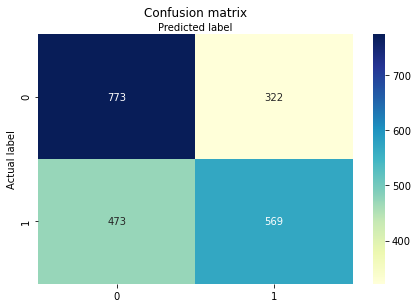

In [515]:
model_predict(x,label,model=BernoulliNB())

Accuracy: 0.5124005615348619
Precision: 0.0
Recall: 0.0

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      1095
           1       0.00      0.00      0.00      1042

    accuracy                           0.51      2137
   macro avg       0.26      0.50      0.34      2137
weighted avg       0.26      0.51      0.35      2137



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


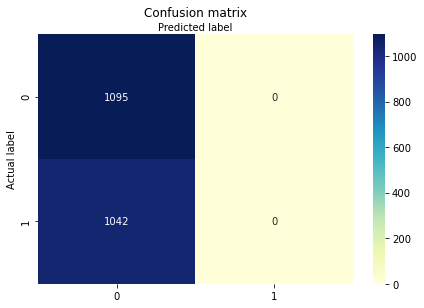

In [516]:
model_predict(word2vec,label,model=BernoulliNB())

Accuracy: 0.5844642021525503
Precision: 0.574468085106383
Recall: 0.5700575815738963

              precision    recall  f1-score   support

           0       0.59      0.60      0.60      1095
           1       0.57      0.57      0.57      1042

    accuracy                           0.58      2137
   macro avg       0.58      0.58      0.58      2137
weighted avg       0.58      0.58      0.58      2137



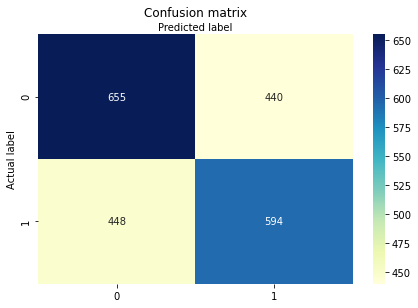

In [517]:
model_predict(x_pca,label,model=BernoulliNB())

### RandomForest

Accuracy: 0.6247075339260646
Precision: 0.6247401247401247
Recall: 0.5767754318618042

              precision    recall  f1-score   support

           0       0.62      0.67      0.65      1095
           1       0.62      0.58      0.60      1042

    accuracy                           0.62      2137
   macro avg       0.62      0.62      0.62      2137
weighted avg       0.62      0.62      0.62      2137



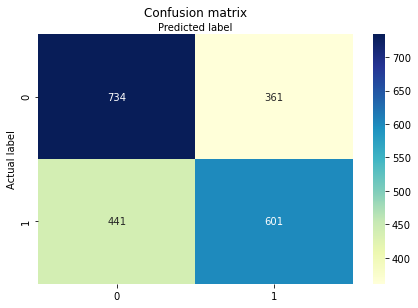

In [518]:
model_predict(x,label,model=RandomForestClassifier())

Accuracy: 0.5049134300421151
Precision: 0.49156118143459915
Recall: 0.4472168905950096

              precision    recall  f1-score   support

           0       0.52      0.56      0.54      1095
           1       0.49      0.45      0.47      1042

    accuracy                           0.50      2137
   macro avg       0.50      0.50      0.50      2137
weighted avg       0.50      0.50      0.50      2137



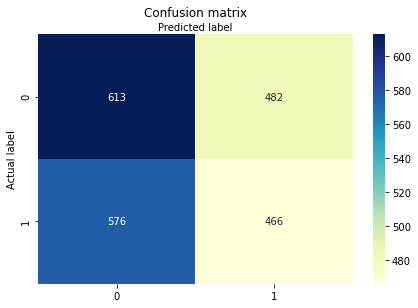

In [519]:
model_predict(word2vec,label,model=RandomForestClassifier())

Accuracy: 0.5919513336452972
Precision: 0.5889121338912134
Recall: 0.5403071017274472

              precision    recall  f1-score   support

           0       0.59      0.64      0.62      1095
           1       0.59      0.54      0.56      1042

    accuracy                           0.59      2137
   macro avg       0.59      0.59      0.59      2137
weighted avg       0.59      0.59      0.59      2137



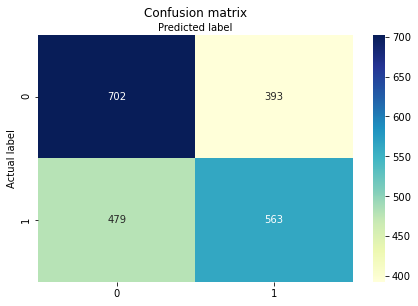

In [520]:
model_predict(x_pca,label,model=RandomForestClassifier())

### Logistic Regression

Accuracy: 0.6270472625175479
Precision: 0.638731596828992
Recall: 0.5412667946257198

              precision    recall  f1-score   support

           0       0.62      0.71      0.66      1095
           1       0.64      0.54      0.59      1042

    accuracy                           0.63      2137
   macro avg       0.63      0.62      0.62      2137
weighted avg       0.63      0.63      0.62      2137



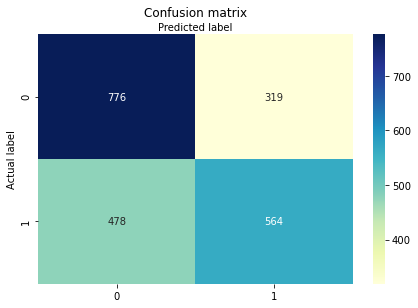

In [521]:
model_predict(x,label,model=LogisticRegression(max_iter=1000, n_jobs=-1))

Accuracy: 0.5105287786616752
Precision: 0.47058823529411764
Recall: 0.030710172744721688

              precision    recall  f1-score   support

           0       0.51      0.97      0.67      1095
           1       0.47      0.03      0.06      1042

    accuracy                           0.51      2137
   macro avg       0.49      0.50      0.36      2137
weighted avg       0.49      0.51      0.37      2137



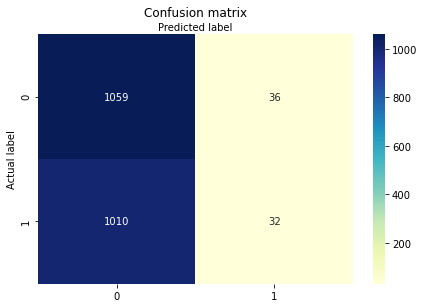

In [522]:
model_predict(word2vec,label,model=LogisticRegression(max_iter=1000, n_jobs=-1))

Accuracy: 0.6172204024333178
Precision: 0.6091617933723197
Recall: 0.5998080614203455

              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1095
           1       0.61      0.60      0.60      1042

    accuracy                           0.62      2137
   macro avg       0.62      0.62      0.62      2137
weighted avg       0.62      0.62      0.62      2137



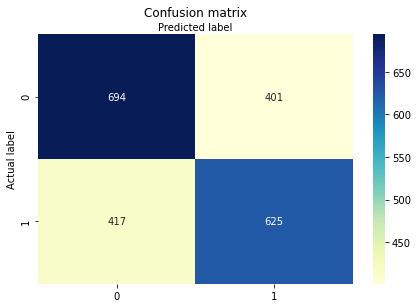

In [523]:
model_predict(x_pca,label,model=LogisticRegression(max_iter=1000, n_jobs=-1))

### KNN

Accuracy: 0.5783809078146935
Precision: 0.5616797900262467
Recall: 0.6161228406909789

              precision    recall  f1-score   support

           0       0.60      0.54      0.57      1095
           1       0.56      0.62      0.59      1042

    accuracy                           0.58      2137
   macro avg       0.58      0.58      0.58      2137
weighted avg       0.58      0.58      0.58      2137



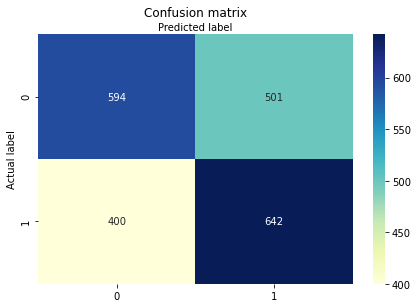

In [524]:
model_predict(x,label,model=KNeighborsClassifier(n_neighbors=5))

Accuracy: 0.5081890500701919
Precision: 0.49554896142433236
Recall: 0.48080614203454897

              precision    recall  f1-score   support

           0       0.52      0.53      0.53      1095
           1       0.50      0.48      0.49      1042

    accuracy                           0.51      2137
   macro avg       0.51      0.51      0.51      2137
weighted avg       0.51      0.51      0.51      2137



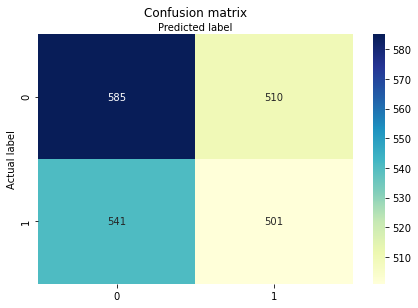

In [525]:
model_predict(word2vec,label,model=KNeighborsClassifier(n_neighbors=5))

Accuracy: 0.5648104819840899
Precision: 0.5565656565656566
Recall: 0.5287907869481766

              precision    recall  f1-score   support

           0       0.57      0.60      0.59      1095
           1       0.56      0.53      0.54      1042

    accuracy                           0.56      2137
   macro avg       0.56      0.56      0.56      2137
weighted avg       0.56      0.56      0.56      2137



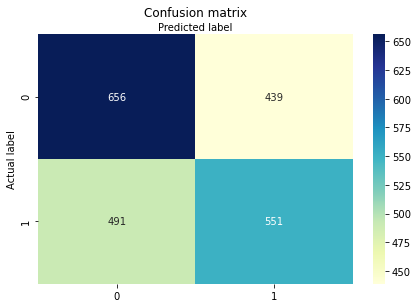

In [526]:
model_predict(x_pca,label,model=KNeighborsClassifier(n_neighbors=5))

### SVM

Accuracy: 0.6218998596162845
Precision: 0.6386255924170616
Recall: 0.517274472168906

              precision    recall  f1-score   support

           0       0.61      0.72      0.66      1095
           1       0.64      0.52      0.57      1042

    accuracy                           0.62      2137
   macro avg       0.62      0.62      0.62      2137
weighted avg       0.62      0.62      0.62      2137



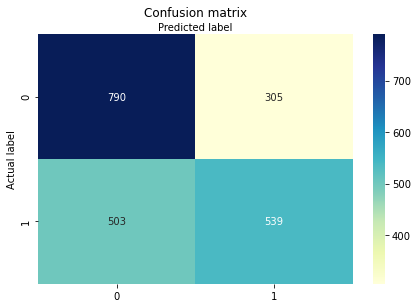

In [527]:
model_predict(x,label,model=SVC(kernel='linear'))

Accuracy: 0.5194197473093122
Precision: 0.5079365079365079
Recall: 0.46065259117082535

              precision    recall  f1-score   support

           0       0.53      0.58      0.55      1095
           1       0.51      0.46      0.48      1042

    accuracy                           0.52      2137
   macro avg       0.52      0.52      0.52      2137
weighted avg       0.52      0.52      0.52      2137



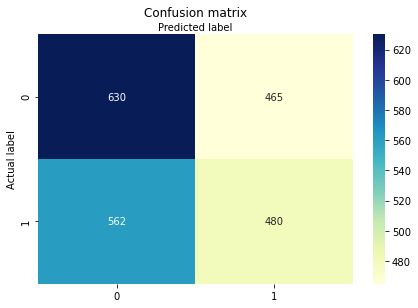

In [528]:
model_predict(word2vec,label,model=SVC(kernel='linear'))

Accuracy: 0.6214319138979878
Precision: 0.6147783251231527
Recall: 0.5988483685220729

              precision    recall  f1-score   support

           0       0.63      0.64      0.64      1095
           1       0.61      0.60      0.61      1042

    accuracy                           0.62      2137
   macro avg       0.62      0.62      0.62      2137
weighted avg       0.62      0.62      0.62      2137



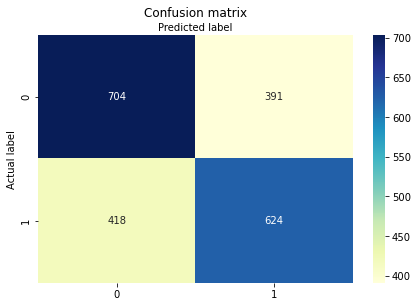

In [529]:
model_predict(x_pca,label,model=SVC(kernel='linear'))

### 判斷 5 日後指數或股價歸類為看漲或看跌進行移動回測，我們選擇表現最好的隨機森林來當作模型

In [530]:
article_acc_result=[]
stock_acc_result=[]
predict_result=pd.DataFrame()

In [531]:
# 定義函數：預測文章篇數是否要出手，若篇數過於接近則不出手
def decide_shot(x):
   
    if len(x.value_counts().values)>=2:
        big=x.value_counts().values[0]
        small=x.value_counts().values[1]
        if big-small<=1:
            return 'no'
        else:
            return x.value_counts().index[0]
    else:
        return x.value_counts().index[0]

In [532]:
#首先根據前面步驟包成一個函數，來方便我們使用移動回測，每四個月預測一次
#使用隨機森林模型，每次取前 4 個月的文章作為訓練資料，預測第 5 個月的漲跌
def moving_predict(train_start,train_end,test_end):
    train=data[(data['post_time'] >= train_start) & (data['post_time'] <= train_end) ]
    test=data[(data['post_time'] > train_end) & (data['post_time'] <= test_end) ]
    all_df=train.append(test)
    data_down=all_df[all_df['up_or_down']==0]
    data_up=all_df[all_df['up_or_down']==1]
    
    #down關鍵字
    jieba_results_down = []
    for sent in data_down.content.astype(str):
        w_string = str()
        ws = jieba.cut(sent, cut_all=False) # 精確模式
        for w in ws:
            w=w.replace(" ",'')
            if not w.isdigit():
                if not w.isnumeric():
                    if w not in stopword_list_ch:
                        text=re.match("^[-+]?[0-9]+$",w) #利用正規表示法去除數字int
                        if not text:
                            text=re.match("(\d+(?:\.\d+)?)",w) #利用正規表示法去除數字float
                            if not text:
                                w=w.replace(" ",'')
                                if w!=" ":
                                    w_string += w + ' '
        jieba_results_down.append(w_string)

    data_down['content_cut']=jieba_results_down
    transformer = TfidfVectorizer(min_df=5)
    tfidf_down = transformer.fit_transform(data_down["content_cut"])
    tfidf_df_down = pd.DataFrame(tfidf_down.toarray(),columns=transformer.get_feature_names())
    down_keywords=tfidf_df_down.sum(axis=0).nlargest(5000).index.values
    
    #up關鍵字
    jieba_results_up = []
    for sent in data_up['content'].astype(str):
        w_string = str()
        ws = jieba.cut(sent, cut_all=False) # 精確模式
        for w in ws:
            w=w.replace(" ",'')
            if not w.isdigit():
                if not w.isnumeric():
                    if w not in stopword_list_ch:
                        text=re.match("^[-+]?[0-9]+$",w) #利用正規表示法去除數字int
                        if not text:
                            text=re.match("(\d+(?:\.\d+)?)",w) #利用正規表示法去除數字float
                            if not text:
                                w=w.replace(" ",'')
                                if w!=" ":
                                    w_string += w + ' '
        jieba_results_up.append(w_string)

    data_up['content_cut']=jieba_results_up
    transformer = TfidfVectorizer(min_df=5)
    tfidf_up = transformer.fit_transform(data_up["content_cut"])
    tfidf_df_up = pd.DataFrame(tfidf_up.toarray(),columns=transformer.get_feature_names())
    up_keywords=tfidf_df_up.sum(axis=0).nlargest(5000).index.values
    
    #all_df切詞
    jieba_results = []
    for sent in all_df.content.astype(str):
        w_string = str()
        ws = jieba.cut(sent, cut_all=False) # 精確模式
        for w in ws:
            w=w.replace(" ",'')
            if not w.isdigit():
                if not w.isnumeric():
                    if w not in stopword_list_ch:
                        text=re.match("^[-+]?[0-9]+$",w) #利用正規表示法去除數字int
                        if not text:
                            text=re.match("(\d+(?:\.\d+)?)",w) #利用正規表示法去除數字float
                            if not text:
                                w=w.replace(" ",'')
                                if w!=" ":
                                    w_string += w + ' '
        jieba_results.append(w_string)

    all_df['content_cut']=jieba_results
    #找出具鑑別力 (扣除共通字詞) 的關鍵字列表，合起來建構向量空間
    unique_words=list((set(down_keywords) | set(up_keywords)) - (set(down_keywords) & set(up_keywords))) 
    transformer = CountVectorizer(min_df=5)
    count = transformer.fit_transform(all_df["content_cut"])
    count_df = pd.DataFrame(count.toarray(),columns=transformer.get_feature_names())
    x=count_df[unique_words]
    x=x.values
    label = all_df["up_or_down"].values

    #進行預測
    train_len=len(train)
    
    x_train=x[:train_len]
    x_evaluation=x[train_len:]
    y_train=label[:train_len]
    y_evaluation=label[train_len:]
    model=RandomForestClassifier()
    model.fit(x_train,y_train)
    predicted_results=[]
    expected_results=[]
    expected_results.extend(y_evaluation)
    predicted_results.extend(model.predict(x_evaluation))
    accuracy=metrics.accuracy_score(expected_results,predicted_results)
    article_acc_result.append(accuracy)
    
    test["prediction"]=predicted_results
    current_df=pd.DataFrame(test.groupby('post_time')['prediction'].agg(decide_shot)).reset_index()
    current_df.rename(columns={ current_df.columns[1]: 'prediction' }, inplace=True)
    current_df['true']=test.groupby('post_time')['up_or_down'].agg(lambda x:x.value_counts().index[0]).values
    
    current_df_shot=current_df.copy()
    current_df_shot=current_df_shot[current_df_shot['prediction']!='no']
    current_df_shot["true"]= current_df_shot["true"].astype('int64')
    current_df_shot["prediction"]= current_df_shot["prediction"].astype('int64')
    
    stock_acc=metrics.accuracy_score(current_df_shot["true"],current_df_shot["prediction"])
    stock_acc_result.append(stock_acc)
    
    return current_df
    

In [533]:
time=pd.date_range("2015-12-31", periods=37, freq="M")

In [534]:
time

DatetimeIndex(['2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
               '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [535]:
for i in range(32): #最多到32
        current_df=moving_predict(time[i],time[i+4],time[i+5])
        predict_result=predict_result.append(current_df)

<ipython-input-532-0a65a2d3df80>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_down['content_cut']=jieba_results_down
<ipython-input-532-0a65a2d3df80>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_up['content_cut']=jieba_results_up
<ipython-input-532-0a65a2d3df80>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

<ipython-input-532-0a65a2d3df80>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediction"]=predicted_results
<ipython-input-532-0a65a2d3df80>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_down['content_cut']=jieba_results_down
<ipython-input-532-0a65a2d3df80>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

<ipython-input-532-0a65a2d3df80>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_up['content_cut']=jieba_results_up
<ipython-input-532-0a65a2d3df80>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediction"]=predicted_results
<ipython-input-532-0a65a2d3df80>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-532-0a65a2d3df80>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["prediction"]=predicted_results
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
<ipython-input-532-0a65a2d3df80>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_down['content_cut']=jieba_results_down
<ipython-input-532-0a65a2d3df8

<ipython-input-532-0a65a2d3df80>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_down['content_cut']=jieba_results_down
<ipython-input-532-0a65a2d3df80>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_up['content_cut']=jieba_results_up
<ipython-input-532-0a65a2d3df80>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [536]:
#預測文章準確度
#我們用excel畫圖
article_acc_result

[0.620253164556962,
 0.656084656084656,
 0.7007299270072993,
 0.6190476190476191,
 0.5969387755102041,
 0.6131687242798354,
 0.6995073891625616,
 0.6239316239316239,
 0.6835443037974683,
 0.6651376146788991,
 0.6777777777777778,
 0.6073298429319371,
 0.6409090909090909,
 0.5545851528384279,
 0.6527415143603134,
 0.5894736842105263,
 0.6623376623376623,
 0.5213270142180095,
 0.6213592233009708,
 0.5191082802547771,
 0.5900383141762452,
 0.631578947368421,
 0.45980707395498394,
 0.5865384615384616,
 0.5477941176470589,
 0.5425790754257908,
 0.5833333333333334,
 0.541095890410959,
 0.604221635883905,
 0.5488958990536278,
 0.6352459016393442,
 0.6187050359712231]

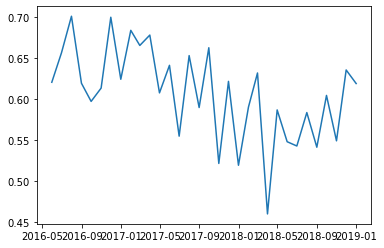

In [538]:
plt.plot(time[5:37],article_acc_result)

In [539]:
#預測股票準確度
#我們用excel畫圖
stock_acc_result

[0.8235294117647058,
 0.7857142857142857,
 0.9230769230769231,
 0.9333333333333333,
 0.8181818181818182,
 0.8823529411764706,
 0.7857142857142857,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8571428571428571,
 0.8333333333333334,
 0.5555555555555556,
 0.8888888888888888,
 0.8,
 0.8823529411764706,
 0.46153846153846156,
 0.9230769230769231,
 0.4444444444444444,
 0.8,
 1.0,
 0.43478260869565216,
 0.5,
 0.42857142857142855,
 0.4666666666666667,
 0.8333333333333334,
 0.42857142857142855,
 0.8,
 0.625,
 0.95,
 0.75]

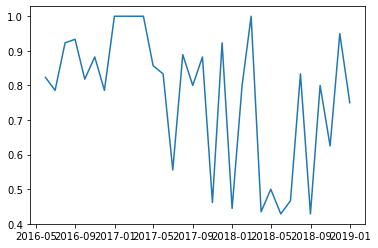

In [540]:
plt.plot(time[5:37],stock_acc_result)

In [541]:
no_ratio= np.sum(predict_result['prediction']=="no")/len(predict_result['prediction'])

In [542]:
#不出手的比率
no_ratio

0.19636363636363635

In [543]:
predict_shot=predict_result[predict_result['prediction']!="no"]

In [544]:
predict_shot

,post_time,prediction,true
0,2016-05-03,1,0
1,2016-05-04,0,0
2,2016-05-05,0,0
4,2016-05-09,1,1
5,2016-05-10,0,0
...,...,...,...
7,2018-12-12,0,1
8,2018-12-13,0,0
10,2018-12-19,0,0
11,2018-12-20,0,0


In [545]:
predict_shot["true"] = predict_shot["true"].astype('int64')
predict_shot["prediction"] = predict_shot["prediction"].astype('int64')

<ipython-input-545-71a92de10a2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_shot["true"]= predict_shot["true"].astype('int64')
<ipython-input-545-71a92de10a2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_shot["prediction"]= predict_shot["prediction"].astype('int64')


In [546]:
metrics.accuracy_score(predict_shot["true"],predict_shot["prediction"])

0.751131221719457

In [547]:
print(metrics.classification_report(predict_shot["true"],predict_shot["prediction"]))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       210
           1       0.72      0.85      0.78       232

    accuracy                           0.75       442
   macro avg       0.76      0.75      0.75       442
weighted avg       0.76      0.75      0.75       442



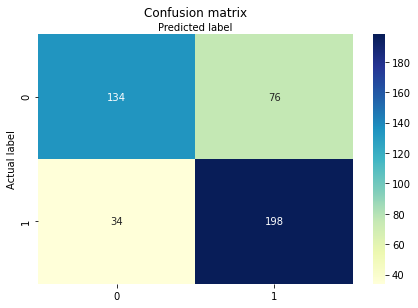

In [548]:
#混淆矩陣視覺化(Heatmap)
matrix=confusion_matrix(predict_shot["true"],predict_shot["prediction"])
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()